In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
def linear_CKA(X, Y):
    """
    Compute linear CKA between two NumPy matrices.
    """
    # Center the representations
    X = X - X.mean(axis=0, keepdims=True)
    Y = Y - Y.mean(axis=0, keepdims=True)

    # Compute the Frobenius norms
    dot_product_similarity = np.linalg.norm(X @ Y.T, 'fro') ** 2
    normalization = np.linalg.norm(X @ X.T, 'fro') * np.linalg.norm(Y @ Y.T, 'fro')

    return dot_product_similarity / normalization


In [43]:
p_to_student_dir = '/Volumes/AK_SSD/sc-DMAE_AK/CKA_embeddings/UWL_student/checkpoints/Spleen'
p_to_teacher_dir = '/Volumes/AK_SSD/sc-DMAE_AK/CKA_embeddings/UWL_teacher/checkpoints/Spleen'

n_iter = 19
epochs = [19,39,59,79,99]

cka_results = np.zeros_like(epochs, dtype=float)

for e in range(len(epochs)):
    epoch_avg = 0
    for i in range(n_iter):
        p_student = f'{p_to_student_dir}/{i}/embedding_{epochs[e]}.npy'
        p_teacher = f'{p_to_teacher_dir}/{i}/embedding_{epochs[e]}.npy'
        embeddings_student = np.load(p_student)
        embeddings_teacher = np.load(p_teacher)
        cka = linear_CKA(embeddings_student, embeddings_teacher)
        epoch_avg += cka
    epoch_avg = epoch_avg/n_iter
    print(epoch_avg)
    cka_results[e] = epoch_avg



0.27916378
0.9049649
0.97800624
0.99067014
0.99310815


In [44]:
print(cka_results)


[0.27916378 0.90496492 0.97800624 0.99067014 0.99310815]


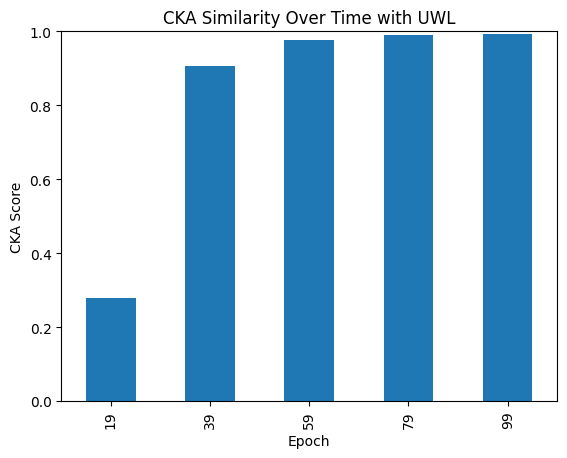

In [46]:
df = pd.DataFrame({
    'Epoch': epochs,
    'CKA': cka_results
})

# Set 'Epoch' as index if you want cleaner x-axis labels
df.set_index('Epoch').plot(kind='bar', legend=False)
plt.ylabel("CKA Score")
plt.title("CKA Similarity Over Time with UWL")
plt.ylim(0, 1)
plt.show()